In [1]:
from TumorModel import Tissue
import numpy as np
import matplotlib.pyplot as plt
import FractalDimensionCalculator as fc
import ImageEntropyCalculator as ec
from TumorModel import Therapy
from TumorModel import CellType
from TumorModel import TherapyType

### No treatment Case

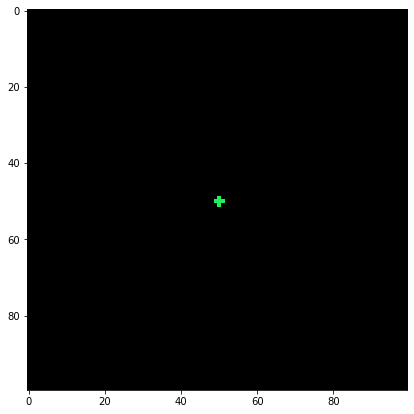

In [94]:
width = 100
height = 100

centerX = int(width/2)
centerY = int(width/2)

tissue = Tissue(width, height)

#Inicializamos el tejido
tissue.addProliferatingCell(centerX, centerY, False)
tissue.addProliferatingCell(centerX + 1,centerY, False)
tissue.addProliferatingCell(centerX - 1, centerY, False)
tissue.addProliferatingCell(centerX, centerY + 1, False)
tissue.addProliferatingCell(centerX, centerY - 1, False)


plt.figure(figsize = (7,7))
plt.imshow(tissue.getPicture(True))

In [95]:
nSteps = 600
tissue.evolveWithMovie(nSteps, True)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [00:56<00:00, 10.70it/s]


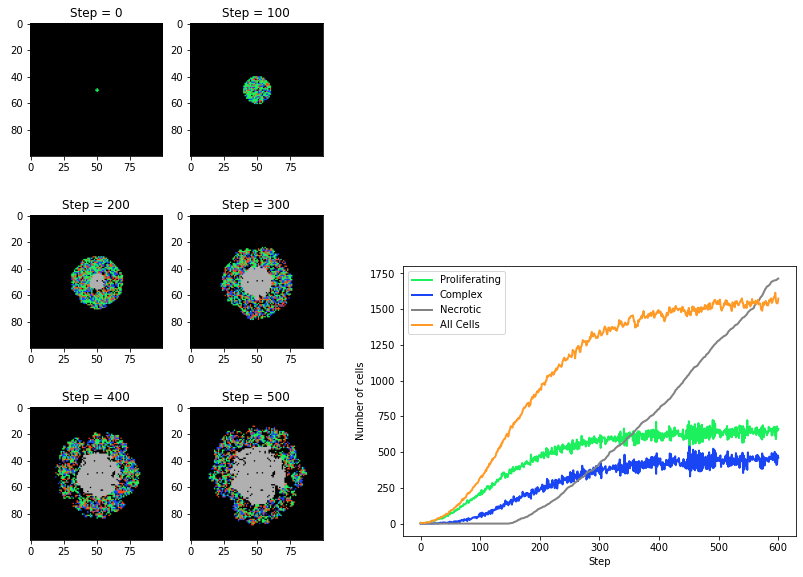

In [96]:
nSnapshots = 6
tumorSlices = tissue.evolutionMovie
nSlices = np.size(tumorSlices, 3)
deltaSlices = np.floor(nSlices/nSnapshots);
snapIndexes = []

for i in range(0,nSnapshots):
    index = i*deltaSlices
    snapIndexes.append(int(index))
    
fig = plt.figure(figsize = (11,8),constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1.4])

ax1 = subfigs[0].subplots(3,2)
ax1[0,0].imshow(tumorSlices[:,:,:,snapIndexes[0]])
ax1[0,0].set_title("Step = "+str(snapIndexes[0]))
ax1[0,1].imshow(tumorSlices[:,:,:,snapIndexes[1]])
ax1[0,1].set_title("Step = "+str(snapIndexes[1]))
ax1[1,0].imshow(tumorSlices[:,:,:,snapIndexes[2]])
ax1[1,0].set_title("Step = "+str(snapIndexes[2]))
ax1[1,1].imshow(tumorSlices[:,:,:,snapIndexes[3]])
ax1[1,1].set_title("Step = "+str(snapIndexes[3]))
ax1[2,0].imshow(tumorSlices[:,:,:,snapIndexes[4]])
ax1[2,0].set_title("Step = "+str(snapIndexes[4]))
ax1[2,1].imshow(tumorSlices[:,:,:,snapIndexes[5]])
ax1[2,1].set_title("Step = "+str(snapIndexes[5]))

ax2 = subfigs[1].subplots(2,1)
subfigs[1].delaxes(ax2[0])
tissue.plotEvolution(ax2[1])



In [97]:
tumorImages = tissue.evolutionMovie
nImages = np.size(tumorImages, 3)
comparisonValue = tissue.colorNecrotic
for s in range(0, nImages):
    image = tumorImages[:,:,:,s]
    if(s%100 == 0):
        print(s)
    for i in range(0,np.size(tumorImages,0)):
        for j in range(0,np.size(tumorImages,1)):
            if((image[i,j,:] == comparisonValue).all()):

                tumorImages[i,j,:,s] = [0,0,0]

entropyValues = np.zeros(nImages)
entropyCalculator = ec.ImageEntropyCalculator()
print("Getting entropy")
for i in range(0,nImages):
    image = tumorImages[:,:,:,i]
    entropyValue = entropyCalculator.computeImageEntropy(image)
    entropyValues[i] = entropyValue

print("Getting fractal dim")
fractalDimensionValues = np.zeros(nImages)
for i in range(0,nImages):
    image = tumorImages[:,:,:,i]
    fractalDimensionCalculator = fc.FractalDimensionCalculator(image)
    N,dimFractal = fractalDimensionCalculator.computeBoxFractalDimension(2)
    fractalDimensionValues[i] = dimFractal

    

0
100
200
300
400
500
600
Getting entropy
Getting fractal dim


Text(0, 0.5, 'Fractal Dimension')

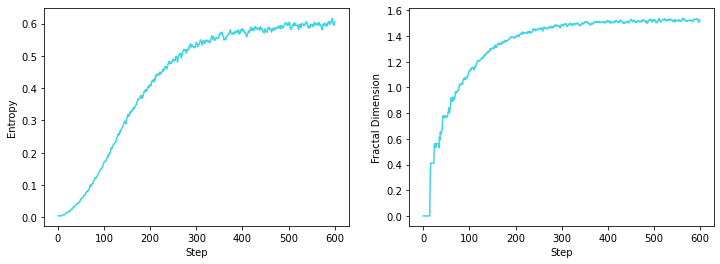

In [98]:
fig,ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(entropyValues, color = "#3dd5e3")
ax[0].set_xlabel("Step")
ax[0].set_ylabel("Entropy")
ax[1].plot(fractalDimensionValues, color = "#3dd5e3")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Fractal Dimension")

### Radiotherapy

In [2]:
width = 100
height = 100

centerX = int(width/2)
centerY = int(width/2)

tissue = Tissue(width, height)

#Inicializamos el tejido
tissue.addProliferatingCell(centerX, centerY, False)
tissue.addProliferatingCell(centerX + 1,centerY, False)
tissue.addProliferatingCell(centerX - 1, centerY, False)
tissue.addProliferatingCell(centerX, centerY + 1, False)
tissue.addProliferatingCell(centerX, centerY - 1, False)

In [3]:
nSteps = 600
#Primero vamos a definir los parámetros de la terapia 
#Día en que se dará la terapia
startDay = int(nSteps/2)
#Factor de muerte para las células que se encuentran en fase G0 
g0Gamma = 0.05
#Peso del término lineal en la exponencial con que se calcula la probabilidad de muerte
alpha = 0.1
#Peso del término cuadrático en la exponencial con que se calcula la probabilidad de muerte
beta = 0.05
#Pasos de la simulación que deben pasar para que se cumpla un ciclo celular
cycleTime = tissue.cellCycleTime
#Dosis de la radiación
dose = 1
#Umbral de oxígeno que bajo el que las células tendrán más probabilidades de ser afectadas
thresholdOxygen = 0.35
#En este tratamiento al principio de la simulación las células se ven poco afectadas, pero después toma efecto con más potencia el tratamiento
#delayTime, define el número de pasos en que se comenzará a afectar fuertemente el tejido
delayTime = 50
#Probabilidades de pasar a necroticas al inicio de la simulación y en la parte final 
initMitoticProb = 0.01
finalMitoticProb = 0.08

radiationTherapy = Therapy(TherapyType.RADIOTHERAPY, startDay, g0Gamma, alpha, beta, cycleTime, dose, thresholdOxygen, delayTime, initMitoticProb, finalMitoticProb)



In [4]:
tissue.addTherapy(radiationTherapy)
tissue.evolveWithMovie(nSteps, True)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [00:40<00:00, 14.76it/s]


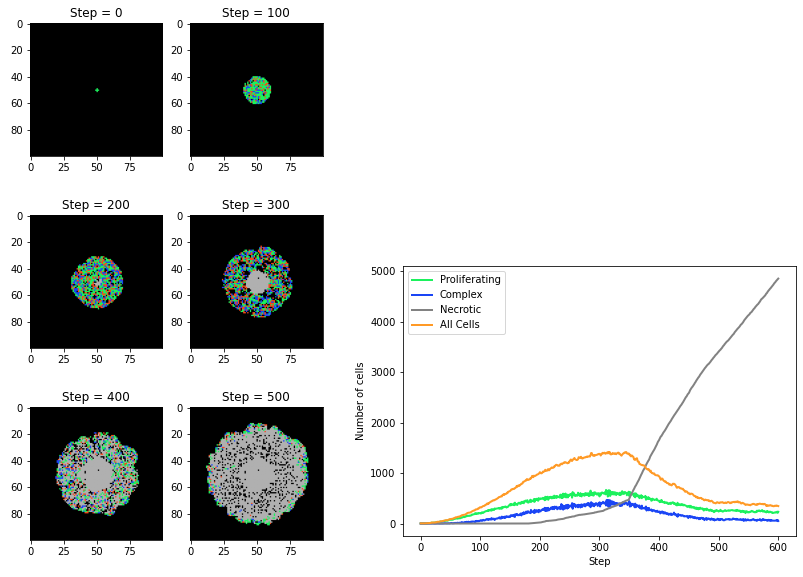

In [5]:
nSnapshots = 6
tumorSlices = tissue.evolutionMovie
nSlices = np.size(tumorSlices, 3)
deltaSlices = np.floor(nSlices/nSnapshots);
snapIndexes = []
for i in range(0,nSnapshots):
    index = i*deltaSlices
    snapIndexes.append(int(index))
    
fig = plt.figure(figsize = (11,8),constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1.4])

ax1 = subfigs[0].subplots(3,2)
ax1[0,0].imshow(tumorSlices[:,:,:,snapIndexes[0]])
ax1[0,0].set_title("Step = "+str(snapIndexes[0]))
ax1[0,1].imshow(tumorSlices[:,:,:,snapIndexes[1]])
ax1[0,1].set_title("Step = "+str(snapIndexes[1]))
ax1[1,0].imshow(tumorSlices[:,:,:,snapIndexes[2]])
ax1[1,0].set_title("Step = "+str(snapIndexes[2]))
ax1[1,1].imshow(tumorSlices[:,:,:,snapIndexes[3]])
ax1[1,1].set_title("Step = "+str(snapIndexes[3]))
ax1[2,0].imshow(tumorSlices[:,:,:,snapIndexes[4]])
ax1[2,0].set_title("Step = "+str(snapIndexes[4]))
ax1[2,1].imshow(tumorSlices[:,:,:,snapIndexes[5]])
ax1[2,1].set_title("Step = "+str(snapIndexes[5]))

ax2 = subfigs[1].subplots(2,1)
subfigs[1].delaxes(ax2[0])
tissue.plotEvolution(ax2[1])

In [103]:
tumorImages = tissue.evolutionMovie
nImages = np.size(tumorImages, 3)
for s in range(0, nImages):
    image = tumorImages[:,:,:,s]
    if(s%100 == 0):
        print(s)
    for i in range(0,np.size(tumorImages,0)):
        for j in range(0,np.size(tumorImages,1)):
            if((image[i,j,:] == tissue.colorNecrotic).all()):
                tumorImages[i,j,:,s] = [0,0,0]
                

entropyValues = np.zeros(nImages)
entropyCalculator = ec.ImageEntropyCalculator()
print("Getting entropy")
for i in range(0,nImages):
    image = tumorImages[:,:,:,i]
    entropyValue = entropyCalculator.computeImageEntropy(image)
    entropyValues[i] = entropyValue

print("Getting fractal dim")
fractalDimensionValues = np.zeros(nImages)
for i in range(0,nImages):
    image = tumorImages[:,:,:,i]
    fractalDimensionCalculator = fc.FractalDimensionCalculator(image)
    N,dimFractal = fractalDimensionCalculator.computeBoxFractalDimension(2)
    fractalDimensionValues[i] = dimFractal


0
100
200
300
400
500
600
Getting entropy
Getting fractal dim


G:\Mi unidad\Proyecto Tumor Automatas\Programas\Modelo completo\FractalDimensionCalculator.py:43: RuntimeWarning: divide by zero encountered in log
  dimension = np.log(N)/np.log(scale)


Text(0, 0.5, 'Fractal Dimension')

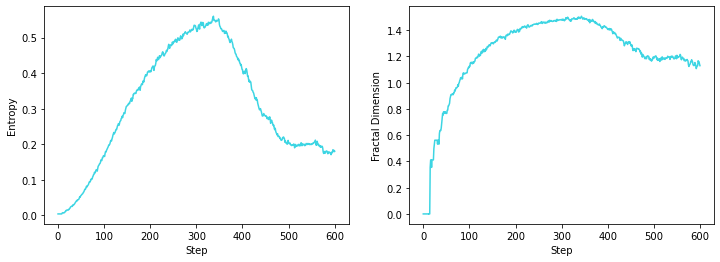

In [104]:
fig,ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(entropyValues, color = "#3dd5e3")
ax[0].set_xlabel("Step")
ax[0].set_ylabel("Entropy")
ax[1].plot(fractalDimensionValues, color = "#3dd5e3")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Fractal Dimension")

### Immunotherapy

In [105]:
width = 100
height = 100

centerX = int(width/2)
centerY = int(width/2)

tissue = Tissue(width, height)

#Inicializamos el tejido
tissue.addProliferatingCell(centerX, centerY, False)
tissue.addProliferatingCell(centerX + 1,centerY, False)
tissue.addProliferatingCell(centerX - 1, centerY, False)
tissue.addProliferatingCell(centerX, centerY + 1, False)
tissue.addProliferatingCell(centerX, centerY - 1, False)

In [106]:
startDay = int(nSteps/2)
therapySteps = 250
rProlifFinal = 0.1
rBindingFinal = 0.8
rEscapeFinal = 0.1
rLysisFinal  = 0.9
rDecayFinal = 0.5
rProlifInitial = 0.85
rBindingInitial = 0.1
rEscapeInitial = 0.5
rLysisInitial = 0.35
rDecayInitial = 0.35

immunoTherapy = Therapy(TherapyType.IMMUNOTHERAPY, startDay, therapySteps, rProlifFinal, rBindingFinal, rEscapeFinal, rLysisFinal, rDecayFinal, rProlifInitial, rBindingInitial, rEscapeInitial, rLysisInitial, rDecayInitial)



In [107]:
tissue.addTherapy(immunoTherapy)
tissue.evolveWithMovie(nSteps,True)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [00:55<00:00, 10.73it/s]


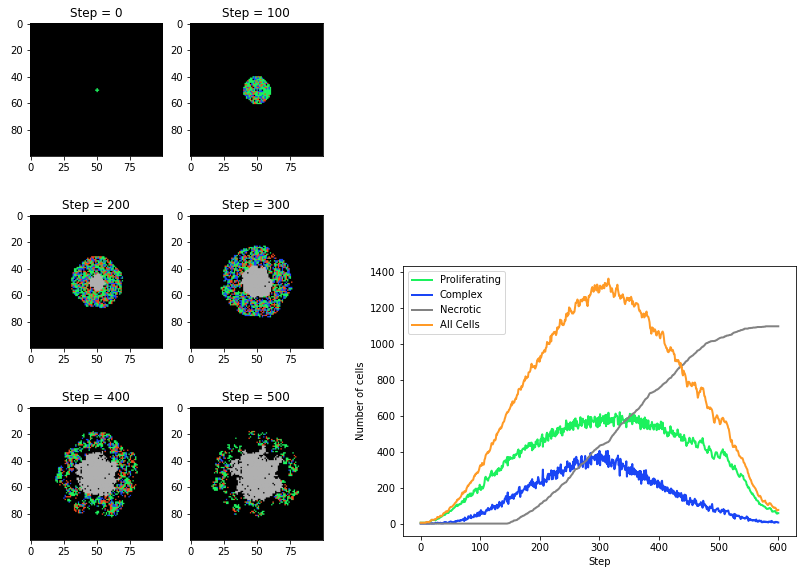

In [108]:
nSnapshots = 6
tumorSlices = tissue.evolutionMovie
nSlices = np.size(tumorSlices, 3)
deltaSlices = np.floor(nSlices/nSnapshots);
snapIndexes = []
for i in range(0,nSnapshots):
    index = i*deltaSlices
    snapIndexes.append(int(index))
    
fig = plt.figure(figsize = (11,8),constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1.4])

ax1 = subfigs[0].subplots(3,2)
ax1[0,0].imshow(tumorSlices[:,:,:,snapIndexes[0]])
ax1[0,0].set_title("Step = "+str(snapIndexes[0]))
ax1[0,1].imshow(tumorSlices[:,:,:,snapIndexes[1]])
ax1[0,1].set_title("Step = "+str(snapIndexes[1]))
ax1[1,0].imshow(tumorSlices[:,:,:,snapIndexes[2]])
ax1[1,0].set_title("Step = "+str(snapIndexes[2]))
ax1[1,1].imshow(tumorSlices[:,:,:,snapIndexes[3]])
ax1[1,1].set_title("Step = "+str(snapIndexes[3]))
ax1[2,0].imshow(tumorSlices[:,:,:,snapIndexes[4]])
ax1[2,0].set_title("Step = "+str(snapIndexes[4]))
ax1[2,1].imshow(tumorSlices[:,:,:,snapIndexes[5]])
ax1[2,1].set_title("Step = "+str(snapIndexes[5]))

ax2 = subfigs[1].subplots(2,1)
subfigs[1].delaxes(ax2[0])
tissue.plotEvolution(ax2[1])



In [109]:
tumorImages = tissue.evolutionMovie
nImages = np.size(tumorImages, 3)
for s in range(0, nImages):
    image = tumorImages[:,:,:,s]
    if(s%100 == 0):
        print(s)
    for i in range(0,np.size(tumorImages,0)):
        for j in range(0,np.size(tumorImages,1)):
            if((image[i,j,:] == tissue.colorNecrotic).all()):
                tumorImages[i,j,:,s] = [0,0,0]

entropyValues = np.zeros(nImages)
entropyCalculator = ec.ImageEntropyCalculator()
print("Getting entropy")
for i in range(0,nImages):
    image = tumorImages[:,:,:,i]
    entropyValue = entropyCalculator.computeImageEntropy(image)
    entropyValues[i] = entropyValue

print("Getting fractal dim")
fractalDimensionValues = np.zeros(nImages)
for i in range(0,nImages):
    image = tumorImages[:,:,:,i]
    fractalDimensionCalculator = fc.FractalDimensionCalculator(image)
    N,dimFractal = fractalDimensionCalculator.computeBoxFractalDimension(2)
    fractalDimensionValues[i] = dimFractal

0
100
200
300
400
500
600
Getting entropy
Getting fractal dim


Text(0, 0.5, 'Fractal Dimension')

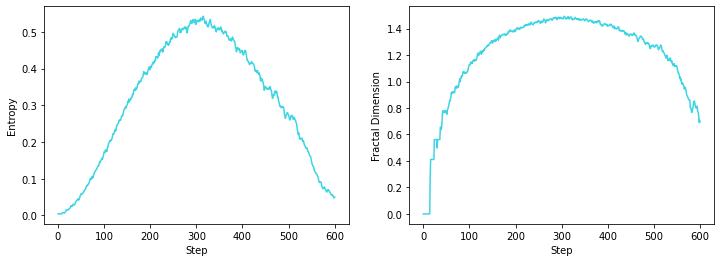

In [110]:
fig,ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(entropyValues, color = "#3dd5e3")
ax[0].set_xlabel("Step")
ax[0].set_ylabel("Entropy")
ax[1].plot(fractalDimensionValues, color = "#3dd5e3")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Fractal Dimension")

### Chemotherapy

In [111]:
width = 100
height = 100

centerX = int(width/2)
centerY = int(width/2)

tissue = Tissue(width, height)

#Inicializamos el tejido
tissue.addProliferatingCell(centerX, centerY, False)
tissue.addProliferatingCell(centerX + 1,centerY, False)
tissue.addProliferatingCell(centerX - 1, centerY, False)
tissue.addProliferatingCell(centerX, centerY + 1, False)
tissue.addProliferatingCell(centerX, centerY - 1, False)

In [112]:
nSteps = 600
startDay = int(nSteps/2)
#Resistencias a tratamiento
treatmentResistances = {}
treatmentResistances[CellType.PROLIFERATING] = 0.4
treatmentResistances[CellType.COMPLEX] = 0.3
treatmentResistances[CellType.DEAD] = 1
treatmentResistances[CellType.NECROTIC] = 1
#Tasas de muerte
killRates = {}
killRates[CellType.PROLIFERATING] = 0.5
killRates[CellType.COMPLEX] = 0
killRates[CellType.DEAD] = 0
killRates[CellType.NECROTIC] = 0
#Coeficientes de atenuación (no se que son así que los haré igual a 0.5 todos)
attenuationCoefficients = {}
attenuationCoefficients[CellType.PROLIFERATING] = 0.1
attenuationCoefficients[CellType.COMPLEX] = 0.1
attenuationCoefficients[CellType.DEAD] = 0.1
attenuationCoefficients[CellType.NECROTIC] = 0.1
#Pasos de tratamiento
treatmentSteps = nSteps - startDay
#Constante de tiempo 
tau = 1
#Factor de farmacodinámica 
PK = 1
widthAreaTreatment = width
heightAreaTreatment = height
initialMedConcentration = 1
resistanceCellsRatio = 0.1
medAbsorptionCells = 0.1
medDifussionConstant = 0.35
applicationSteps = 2

chemoTherapy = Therapy(TherapyType.CHEMOTHERAPY, startDay, treatmentResistances, killRates, attenuationCoefficients, treatmentSteps, tau, PK, widthAreaTreatment, heightAreaTreatment, initialMedConcentration, resistanceCellsRatio, medAbsorptionCells, medDifussionConstant, applicationSteps)

In [113]:
tissue.addTherapy(chemoTherapy)
tissue.evolveWithMovie(nSteps, True)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [01:04<00:00,  9.28it/s]


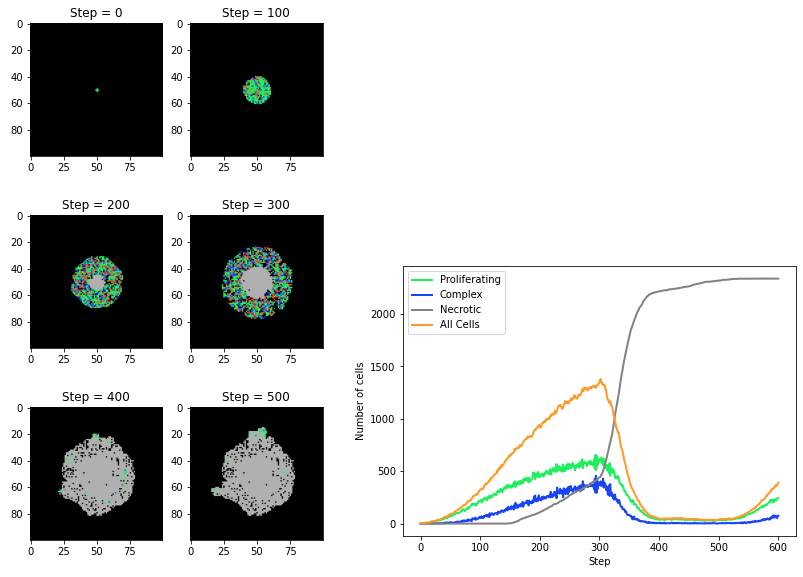

In [114]:
nSnapshots = 6
tumorSlices = tissue.evolutionMovie
nSlices = np.size(tumorSlices, 3)
deltaSlices = np.floor(nSlices/nSnapshots);
snapIndexes = []
for i in range(0,nSnapshots):
    index = i*deltaSlices
    snapIndexes.append(int(index))
    
fig = plt.figure(figsize = (11,8),constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1.4])

ax1 = subfigs[0].subplots(3,2)
ax1[0,0].imshow(tumorSlices[:,:,:,snapIndexes[0]])
ax1[0,0].set_title("Step = "+str(snapIndexes[0]))
ax1[0,1].imshow(tumorSlices[:,:,:,snapIndexes[1]])
ax1[0,1].set_title("Step = "+str(snapIndexes[1]))
ax1[1,0].imshow(tumorSlices[:,:,:,snapIndexes[2]])
ax1[1,0].set_title("Step = "+str(snapIndexes[2]))
ax1[1,1].imshow(tumorSlices[:,:,:,snapIndexes[3]])
ax1[1,1].set_title("Step = "+str(snapIndexes[3]))
ax1[2,0].imshow(tumorSlices[:,:,:,snapIndexes[4]])
ax1[2,0].set_title("Step = "+str(snapIndexes[4]))
ax1[2,1].imshow(tumorSlices[:,:,:,snapIndexes[5]])
ax1[2,1].set_title("Step = "+str(snapIndexes[5]))

ax2 = subfigs[1].subplots(2,1)
subfigs[1].delaxes(ax2[0])
tissue.plotEvolution(ax2[1])



In [115]:
tumorImages = tissue.evolutionMovie
nImages = np.size(tumorImages, 3)
for s in range(0, nImages):
    image = tumorImages[:,:,:,s]
    if(s%100 == 0):
        print(s)
    for i in range(0,np.size(tumorImages,0)):
        for j in range(0,np.size(tumorImages,1)):
            if((image[i,j,:] == tissue.colorNecrotic).all()):
                tumorImages[i,j,:,s] = [0,0,0]

entropyValues = np.zeros(nImages)
entropyCalculator = ec.ImageEntropyCalculator()
print("Getting entropy")
for i in range(0,nImages):
    image = tumorImages[:,:,:,i]
    entropyValue = entropyCalculator.computeImageEntropy(image)
    entropyValues[i] = entropyValue

print("Getting fractal dim")
fractalDimensionValues = np.zeros(nImages)
for i in range(0,nImages):
    image = tumorImages[:,:,:,i]
    fractalDimensionCalculator = fc.FractalDimensionCalculator(image)
    N,dimFractal = fractalDimensionCalculator.computeBoxFractalDimension(2)
    fractalDimensionValues[i] = dimFractal

0
100
200
300
400
500
600
Getting entropy
Getting fractal dim


Text(0, 0.5, 'Fractal Dimension')

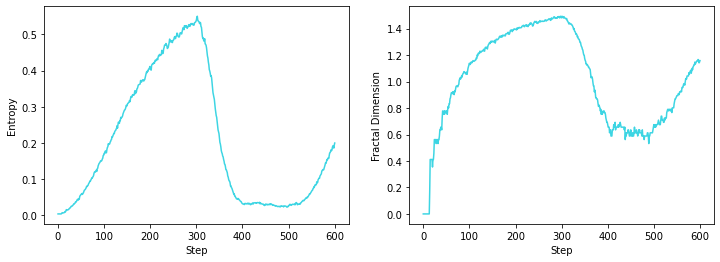

In [116]:
fig,ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(entropyValues, color = "#3dd5e3")
ax[0].set_xlabel("Step")
ax[0].set_ylabel("Entropy")
ax[1].plot(fractalDimensionValues, color = "#3dd5e3")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Fractal Dimension")

False

## Tumor structure image

In [35]:
width = 150
height = 150

centerX = int(width/2)
centerY = int(width/2)

tissue = Tissue(width, height)

#Inicializamos el tejido
tissue.addProliferatingCell(centerX, centerY, False)
tissue.addProliferatingCell(centerX + 1,centerY, False)
tissue.addProliferatingCell(centerX - 1, centerY, False)
tissue.addProliferatingCell(centerX, centerY + 1, False)
tissue.addProliferatingCell(centerX, centerY - 1, False)

tissue.rBinding = 1
tissue.rProlif = 0.98
tissue.K = 2000
tissue.et = 0.1
tissue.consumptionProlif = 0.0001
tissue.diffusionConstant = 0.001
tissue.consumptionQuiescent = 0.0001

nSteps = 400
tissue.evolveWithMovie(nSteps, True)

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [01:00<00:00,  6.59it/s]


[]

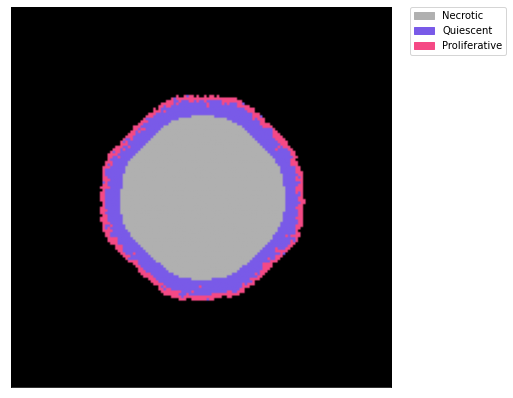

In [36]:
import matplotlib.patches as mpatches
necroticColor = tissue.colorNecrotic
quiescentCellColor = [121/255, 90/255, 232/255]
proliferativeCellColor = [245/255, 73/255, 133/255]

necroticCells = tissue.necroticPositions
quiescentCells = tissue.quiescentCells
occupiedPositions = tissue.occupiedPositions
colors = [necroticColor, quiescentCellColor, proliferativeCellColor]
names = ["Necrotic","Quiescent", "Proliferative"]

imageQuiescentNecrotic = np.zeros((tissue.height, tissue.width, 3))

patches = [ mpatches.Patch(color=colors[i], label=names[i]) for i in range(len(colors)) ]
# put those patched as legend-handles into the legend



for i in range(np.size(imageQuiescentNecrotic, 0)):
    for j in range(np.size(imageQuiescentNecrotic,1)):
        if(necroticCells[i,j] == 1):
            imageQuiescentNecrotic[i,j,:] = necroticColor
        elif(occupiedPositions[i,j] == 1 and quiescentCells[i,j] == 1):
            imageQuiescentNecrotic[i,j,:] = quiescentCellColor
        elif(occupiedPositions[i,j] == 1):
            imageQuiescentNecrotic[i,j,:] = proliferativeCellColor
            
plt.figure(figsize = (7,7))
plt.imshow(imageQuiescentNecrotic)
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )            
plt.gca().grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

In [22]:
tissue.necroticPositions[50,50]
print(necroticCells[50,50])

0.0
